In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install --upgrade nibabel


     |████████████████████████████████| 3.3 MB 7.5 MB/s 
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

--2022-04-09 08:23:00--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 40.108.230.53
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|40.108.230.53|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?ga=1 [following]
--2022-04-09 08:23:01--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?ga=1
Reusing existing connection to putpoznanpl-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 5672415949 (5.3G) [application/x-zip-compressed]
Saving to: ‘public.zip’

public.zip          100%[===================>]   5.28G  18.0MB/s    in 5m 20s  

2022-04-09 08:28:22 (16.9 MB/s) - ‘public.zip’ saved [5672415949/5672415949]

In [ ]:
!mv '/content/FirstDataset' '/content/drive/MyDrive/project_gourish/'

In [ ]:
!mv '/content/SecondDataset' '/content/drive/MyDrive/project_gourish/'

In [ ]:
!mkdir /content/drive/MyDrive/project_gourish/FirstDataset/valid
!mkdir /content/drive/MyDrive/project_gourish/SecondDataset/valid

In [ ]:
!mkdir /content/drive/MyDrive/project_gourish/FirstDataset/train2


In [ ]:
base_path = '/content/drive/MyDrive/project_gourish'

In [ ]:
import os
import shutil

print("FirstDataset")
filepath1 = base_path + '/FirstDataset/train'
filenames1 = os.listdir(filepath1)
filenames1 = sorted(filenames1)
print('train', len(filenames1))
print('test', len(os.listdir(base_path+'/FirstDataset/test')))

print("SecondDataset")
filepath2 = base_path+'/SecondDataset/train'
filenames2 = os.listdir(filepath2)
filenames2 = sorted(filenames2)
print('train', len(filenames2))
print('test', len(os.listdir(base_path + '/SecondDataset/test')))

FirstDataset
train 574
test 72
SecondDataset
train 100
test 25


In [ ]:
import os
import shutil
from pathlib import Path

# FirstDataset
filepath1 = Path(base_path + '/FirstDataset/train')

first_X = []
first_y = []

for scan_path in sorted(filepath1.iterdir()):
  if scan_path.name.endswith('mask.nii.gz'):
    first_y.append(scan_path)
  else:
    first_X.append(scan_path)

print(len(first_X))
print(len(first_y))

# SecondDataset
filepath2 = Path(base_path + '/SecondDataset/train')

second_X = []
second_y = []

for scan_path in sorted(filepath2.iterdir()):
    second_y.append(scan_path/'mask.nii.gz')
    second_X.append(scan_path/'T1w.nii.gz')

print(len(second_X))
print(len(second_y))

287
287
100
100


In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(first_X, first_y, train_size=0.9, random_state=42)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(second_X, second_y, train_size=0.9, random_state=42)

X_train = X_train_1 + X_train_2
y_train = y_train_1 + y_train_2
X_valid = X_valid_1 + X_valid_2
y_valid = y_valid_1 + y_valid_2

print('X_train len:', len(X_train))
print('X_valid len:', len(X_valid))
print('y_train len:', len(y_train))
print('y_valid len:', len(y_valid))

X_train len: 348
X_valid len: 39
y_train len: 348
y_valid len: 39


In [ ]:
import numpy as np
import nibabel as nib

from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

In [ ]:
!rm -rf /content/Images

!mkdir /content/Images

!mkdir /content/Images/valid
!mkdir /content/Images/valid/images
!mkdir /content/Images/valid/images/images
!mkdir /content/Images/valid/masks
!mkdir /content/Images/valid/masks/masks

!mkdir /content/Images/train
!mkdir /content/Images/train/images
!mkdir /content/Images/train/images/images
!mkdir /content/Images/train/masks
!mkdir /content/Images/train/masks/masks

print("done")

done


In [ ]:
!mv '/content/Images' '/content/drive/MyDrive/project_gourish/'

In [ ]:
!ls /content/drive/MyDrive/project_gourish/Images/valid/images/images


In [ ]:
print(y_train)


[PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/31a1d5a10bfef78b092fa157a9a57e77_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/633fc6f4b78b0fba7f735e2dda2634fc_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/86c65c6de48c4428a032a24f64b43393_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/984fd65e754d18a501918652b8f93bf9_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/ba49199eed46b6daf8d933170624e02d_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/3600b0c2de04973782eee6256d453fb3_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/4ddb5f7f83a1cca31a1252d17feedbfe_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/train/3f7b1d4641cf3fd007effa36f8c87811_mask.nii.gz'), PosixPath('/content/drive/MyDrive/project_gourish/FirstDataset/

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_train_path = base_path + '/Images/train/images/images/'
mask_train_path = base_path + '/Images/train/masks/masks/'

image_valid_path = base_path + '/Images/valid/images/images/'
mask_valid_path = base_path + '/Images/valid/masks/masks/'


print('X_train start')
for scan_idx, scan_path in enumerate(X_train):
  print(scan_path)

  raw_volume, affine = load_raw_volume(scan_path)

  for slice_idx in range(raw_volume.shape[0]):
    path = f'{image_train_path}train_image_{scan_idx}_slice_{slice_idx}_.png'

    volume = raw_volume[slice_idx]

    volume_max = np.amax(volume)
    volume_min = np.amin(volume)

    volume = (volume-volume_min)/(volume_max-volume_min)
    volume = volume*255
    volume = volume.astype('uint8')
    matplotlib.image.imsave(path, volume, cmap="gray")

print("X_train finish")


print('y_train start')
for scan_idx, scan_path in enumerate(y_train):
  print(scan_path)

  mask_volume = load_labels_volume(scan_path)
  for slice_idx in range(mask_volume.shape[0]):
    path = f'{mask_train_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'

    matplotlib.image.imsave(path, mask_volume[slice_idx], cmap="gray")

print("y_train finish")


print('X_valid start')
for scan_idx, scan_path in enumerate(X_valid):
  print(scan_path)

  raw_volume, affine = load_raw_volume(scan_path)

  for slice_idx in range(raw_volume.shape[0]):
    path = f'{image_valid_path}valid_image_{scan_idx}_slice_{slice_idx}_.png'
    volume = raw_volume[slice_idx]

    volume_max = np.amax(volume)
    volume_min = np.amin(volume)

    volume = (volume-volume_min)/(volume_max-volume_min)
    volume = volume*255
    volume = volume.astype('uint8')

    matplotlib.image.imsave(path, volume, cmap="gray")
print("X_valid finish")

print('y_valid start')
for scan_idx, scan_path in enumerate(y_valid):
  print(scan_path)

  mask_volume = load_labels_volume(scan_path)
  for slice_idx in range(mask_volume.shape[0]):
    path = f'{mask_valid_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'

    matplotlib.image.imsave(path, mask_volume[slice_idx], cmap="gray")
print("y_valid finish")

X_train start
/content/drive/MyDrive/project_gourish/FirstDataset/train/31a1d5a10bfef78b092fa157a9a57e77.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/633fc6f4b78b0fba7f735e2dda2634fc.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/86c65c6de48c4428a032a24f64b43393.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/984fd65e754d18a501918652b8f93bf9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ba49199eed46b6daf8d933170624e02d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3600b0c2de04973782eee6256d453fb3.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/4ddb5f7f83a1cca31a1252d17feedbfe.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3f7b1d4641cf3fd007effa36f8c87811.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6abdd91504e3864922908db40ad35795.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/48816b122782e2a7b55a40d9ae3bf7a4.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/92f57a31ca1d72eb4b4725f76ae70b69.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/86e621a906947b308ad825edbb6c6605.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/24331f8c41e24b158a13a5653634558f.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/1cdd4ddcbd83403d890b14cb499776e5.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/1d6d9dee686d7088cc6266eab3b3e0fd.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/a1bbd1250b350ce51133430867006ebd.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/565b27aec019efff1d3e494a27f4ced6.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b70696ad0a9158805479026052367ffc.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/97997cb00a71ec010c553063616c17e9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9a996042b63b0d2a2514cb70f465284d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/92f452ba1020d4ed51e2463b95aafca0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/06503d8025b2830c50599cfcc0febd39.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4aadafa8126f890d9963d0c9e9a9f8f3.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b13151e196a0c8e89f5c7e3e30c2200f.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3ceea673d5e9be71c0baf5e12e809408.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/7c12d05b03bcbd69f88959461738f0c2.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/64fc34796f18199faaf9cc60998c5bbb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5b218b1dc9e7dc7e3f5012b42779e88b.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/fd90fbcf1edcdd8f5f24751db05f3c45.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b666a963805cb535a16312b81a369250.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/50e33dbbf1c955c80057c4584d64ff12.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/1b848abc984a32be6af0792d7293f63f.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/c21ae99f6b8260f1a520a3cc7ab469a2.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/cbab2172468035987821c11d29290633.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/f77b934a9ad45529b213993a0c96f521.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5620f0607730f7fd945e8276b86deade.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6b46cb701035d0bb03bf0a0fa090038e.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/a1ef050c5206ce323aaedb57a9b69305.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3a14401f2de9c2eb4fe22f2228f81309.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/68b91fb712cd2c2a577a39966b9938b6.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/cd877a3d2941cdd10b1e9e8034afdff9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/2e95bc23d0d3d1b2fcb152b5d8e55a75.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ee1d2e5f3a6e9bf0dbbf6819217eb920.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/95188131b9f39e1a83f9e17c134ee440.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/7a20e0898482830c313de2657ada3fd8.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ccf75b11b57ab70f280da53252ff228a.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/e915a3dff4198ad13fe584d517dd76cb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6f5175fb37e3ad1dcd767480ac4ea74a.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/95c70ae79f166bbcfb3d5e436b02ca90.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9cdc3a57413f33e4635c2c576c01a172.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/f204c71ef3a2203d018fc4efe29eed45.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/fa24f2cec205b4162d27150096ad52e7.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/992decae68838ce3f88b782c115bfac7.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4502b172504adaacefa162003163388a.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/5eb8a90c38b6ba6c28ed5a554ebb2221.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4a0e8d6497a9bb7f2873987b2d2ac2ee.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/688df41a73dd40e456ce384bfa1843b9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6f64f9b68b4dec682df15fe350b35102.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/90b2177da2831a2a726c331087b24806.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6c251e4f25b565b8658587c11f1965e0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9fcd0dc0a5c0fec8406692f6157d7411.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/58efb5a391a345e41b6e78467e5c0c06.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/a4668fc3679a7c87ad5b4ec5a8f0f959.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/914f96b7bdd547d65531841a6c2f893f.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ae9ac1ba9049e8988834022ce42b7bb9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ddb411f805c8467bafe23a1b3b8c8d2d.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/eb0492ee36ac7ece4d9aff7a3aa5e253.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b2810391eab3c44ca6980c0c57e7a5af.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/408ee94e66a846bf5fd82d0fa59b5006.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9a347d41025b4c8e60e1ab3c77e809de.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5063fed39a27b0644e70bd23050a18e4.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ad9dbd2a0719b6c89332fa13dae33c50.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/117ced821b54b4a72be4c0ef73dabec0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/29f9752af4a89d20212221ba8bc6fded.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/22d543ce52640dc545d993301b1dd114.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/7dfa3d525ea6603ae4e2dc76470de99a.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/b59effd5bb2c7958f6d7e9ab207cfe91.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b842c90ff5bd37be57e492c9395b51b0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/317915fef2c5cbc2954100c7c7432a44.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/dafd1cbae4b4e6d69b370aa262e52d2b.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b3910c0237028f91f70bf2a1c71949be.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/7994d4852c0095c2575a4a88ba7bd072.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/1e9d86cdfac8565a068016843e43ca75.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/facc52e047affeb776b57884c8cef041.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/7d7b2e55e2cc6efaadeafa4a36e77628.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9af5021435c68e7aae86f678c9e6539c.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/f2480c597c39845b9ba4d1d0714c3940.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5aee24cafae090c75bdb9976864b6b4a.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/d0ebfa402db0c523bd051c5ec53ddaf9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ce8f62de14ef4409259ac5f6d0ce853b.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/58ffd96b09e7337b2eedd17762778b8c.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/2c28b68aef975c391a96b6bc8bb1ad48.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3da414bfe6aa91a2046547c0087b0ffa.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/87fcfae6be7a67dffd1dcbff8180a9ee.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b9bb79675d87cb1dc88928687f569dab.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/9e6abc913cf682dd895fb1546075d585.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/c4efcd7c3d26f2cc802ff4e323717182.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/105625ce5c645192e3c3ca78b7b32edb.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/fcd7ef3c8ee90908fe01854bfc5ea1e5.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/e548487f1e639a320c32928f3e32b90e.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/20667b7d5f8adc5ce2785e9d29d2b453.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/d5f2869ed9fb89a98557dab65a51d898.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/04e0e6ed0432fd737fd3f29fe551b77c.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6d3e82944ef5fddaf3b9bfdcd146558b.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/24805671584664e6c3339d8515ec0755.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/a00ab95d79e2b9e16a5681e7943bd745.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/91fac31aee832d06eb34764281954b3c.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/fbbaba5473e1133d8d0bfc48d3fff20c.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/cffb3c1f11d75b137491d20bcb918025.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/7a7f66d38dbe5c4e4c03ce13acbdc949.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3e4705f5e5420bfae3caaac2d1f4b2b3.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/79533968f0b53a3f2e7537f17fc92519.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/748e016a9433a595d7cd71f418d76b6d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/f8bff349c7db6300c31c0d32bcc499fc.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/dce4ae3f8ecbb8ca9e37f2d3ec823851.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/4574a48cdbd803e41eaedb4ad5284083.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/dfd38769c966b7556de896154c0e065d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4016eed02fb502d4352fc13013cc1bbc.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/33cb6ae6baabe339e7e1d000cd8349af.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b88620463e0d75b4613b87f046b62a73.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/8e174ae4108e983350300b66c23c9400.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/2fab3b0d1eb9f16ebf7c0171b5343d25.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6e14b7ac45ed7c73437e06f0a2bb8628.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/d68edaf87a43d0531d527f7f8dfc11fb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/8cc6f19643dc15bb849f60fb26745e76.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/b6f5c586d6381579635b2f6d7d87a3f8.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/27a4be33ffa50c310c9878bbd7003895.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/e91727f54f5c195e41767dcc8035cdf8.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/0a2de3cae8ca66ea62b7e2dae3bdffca.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/977cfe9bdcc649bfd2e75e0a8194f057.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b404fd6eed21b2d13282e9ec238a1afb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ea5ec0092dc0b60e4289995d36aab4ef.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/61241ae9448bf1d6a2bcb50ed250e63d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/53b8991eefad27512c9d5def5f207859.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4ede7fbafcf1ce0925c0c6691080e69e.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/8a389b146940a12dbe188fe250665a7d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5a8610ea7222b57c17841df8d8605a5d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5121112e67777a6ef0279a2b0d0eab0a.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/bbd77c697f010fc06e094317a915ca93.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/6c46b569f3b1adc391f17d11d216b547.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ff201212b8c2d041da9213e99ffb89f0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/1bd637ec336fd6bc752c5d57a6a93a80.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ab369ac55a48b689153d3ba522409830.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/46b1cb48fd0adefcdf4cad3821a653ac.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5ffb2f4e39d099fc189ff6787408c3a1.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/f1e5b1375baa55b625ec8ae3d29088f3.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/5c49fb9a443e7b786c238427a327d5b7.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/3b37fbfa3d702aac69e12143a5146d42/T1w.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/54778eeec78208050bbd9629b9c9536a/T1w.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/b10071b6c1d64d02dfc9d73317e56afd/T1w.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/5836dde5076e3d47f3cc259698db650b/T1w.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/ea2439dc3437b1964f3b4232edc4437d/T1w.nii.gz
/content/drive/MyDrive/project_gourish/SecondDataset/train/0a2bab2c80835a3597c3e423012e1be7/T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/83182c5425f81a4ab116d680ba4a27f9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/bb9f4f79ea935f0f2fe052845fb18916.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ce921428838f6933d693415dbab8e55e.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b3fb10655decdd2a93bc0bed99d0137e.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/58f4e1954e11a28da97e9aa62e5f5deb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/4750ba54b682be8a877af7bc147c3242.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/60f24565ac5fb32bc919d21077f1b64a.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/25a4d9cad364b5ecdfa8cd4191955c55.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/7adf14a618903a126b1e263b44d69efb.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/b76e06ed30fcb27a2f39d61f5f12b713.nii.gz
/content/drive/MyDri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


/content/drive/MyDrive/project_gourish/FirstDataset/train/05b438c4933b77168c529ea19486a1c9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/ccd2022bb43115bdb0518c9f26c831e9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/d48f1beaa21ffba24931f9b7fe5ffde0.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/e4e9650ecb68db7f61152bce3bf867d5.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/35a602e498a4a1a7290077a0d59785e3.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/f04ed51fee638fddcdd56fb7c5e373b9.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/d5a5df4143f5750b07556b5d494d6f4d.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/3adbc91530f4d1d9dc046719cfea1445.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/8d18fc4de6de7f22d2fbba86bb70abec.nii.gz
/content/drive/MyDrive/project_gourish/FirstDataset/train/8d658a6cd2eb3e0423a8249ddb754a9d.nii.gz
/content/drive/MyDri

(288, 288, 3)
255
0


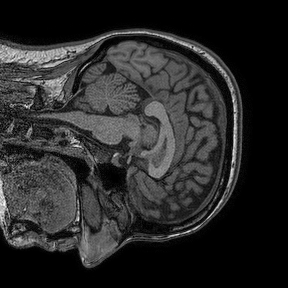

In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread(base_path+'/Images/valid/images/images/valid_image_2_slice_77_.png') 
  
print(img.shape)
print(np.amax(img))
print(np.amin(img))
cv2_imshow(img) 


(256, 256, 3)
255
0


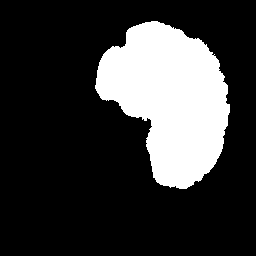

In [ ]:
img = cv2.imread(base_path+'/Images/valid/masks/masks/train_mask_0_slice_105_.png') 
  
print(img.shape)
print(np.amax(img))
print(np.amin(img))
cv2_imshow(img) 

In [ ]:
!zip -r data_images2.zip /content/drive/MyDrive/project_gourish/Images

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_184_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_185_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_186_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_187_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_188_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_189_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_190_.png (deflated 85%)
  adding: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_191_.png (deflated 85%)
  add

In [ ]:
!cp /content/data_images2.zip -r /content/drive/MyDrive/project_gourish

In [ ]:
!unzip /content/data_images2.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_184_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_185_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_186_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_187_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_188_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_189_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_190_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mask_321_slice_191_.png  
  inflating: content/drive/MyDrive/project_gourish/Images/train/masks/masks/train_mas

69503
(288, 288, 4)
1.0
0.0


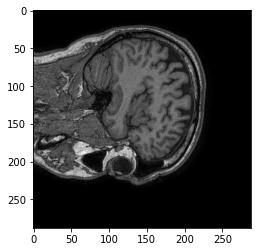

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_2 = '/content/content/drive/MyDrive/project_gourish/Images'

print(len(os.listdir(base_path_2 + '/train/images/images')))

image = plt.imread(base_path_2 + '/train/images/images/train_image_0_slice_112_.png')

print(image.shape)
print(image.max())
print(image.min())
plt.imshow(image)

In [ ]:
import tensorflow as tf

augmentations=dict(
        horizontal_flip=True,
        vertical_flip=True
)

images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    # **augmentations,
    validation_split=0.2
    )

mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    # **augmentations,
    validation_split=0.2
 )

In [ ]:
BATCH_SIZE = 128

train_images_generator = images_datagen.flow_from_directory(
    '/content/content/drive/MyDrive/project_gourish/Images/train/images',
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    seed=42,
    interpolation='bilinear',
    color_mode='grayscale',
    class_mode=None,
    subset = 'training'
    )


train_mask_generator = mask_datagen.flow_from_directory(
    '/content/content/drive/MyDrive/project_gourish/Images/train/masks',
     target_size=(128, 128),
     batch_size=BATCH_SIZE,
     seed=42,
     class_mode=None,
     color_mode='grayscale',
     interpolation='bilinear',
     subset = 'training'
    )

val_images_generator = images_datagen.flow_from_directory(
    '/content/content/drive/MyDrive/project_gourish/Images/valid/images',
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    seed=42,
    interpolation='bilinear',
    color_mode='grayscale',
    class_mode=None,
    subset = 'validation'
    )
val_mask_generator = mask_datagen.flow_from_directory(
    '/content/content/drive/MyDrive/project_gourish/Images/valid/masks',
     target_size=(128, 128),
     batch_size=BATCH_SIZE,
     interpolation ='bilinear',
     color_mode='grayscale',
     seed=42,
     class_mode=None,
     subset = 'validation'
    )

train_combined_generator = zip(train_images_generator, train_mask_generator)
val_combined_generator = zip(val_images_generator, val_mask_generator)

Found 55603 images belonging to 1 classes.
Found 55603 images belonging to 1 classes.
Found 1542 images belonging to 1 classes.
Found 1542 images belonging to 1 classes.


(128, 128, 1)
0.80392164
0.0
(128, 128)


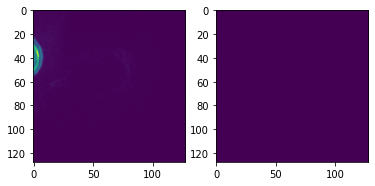

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images,masks = next(train_combined_generator)
# print(images[0])

print(images[0].shape)
print(images[0].max())
print(images[0].min())
print(images[0].squeeze().shape)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(images[0].squeeze())
fig.add_subplot(1, 2, 2)
plt.imshow(masks[0].squeeze())

In [ ]:
!pip install segmentation_models

     |████████████████████████████████| 50 kB 5.0 MB/s 


In [ ]:
%env SM_FRAMEWORK=tf.keras


env: SM_FRAMEWORK=tf.keras


In [ ]:
import segmentation_models
from segmentation_models import Unet
import keras
from segmentation_models.losses import dice_loss

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K



model_base = Unet('efficientnetb1', classes=1, activation='sigmoid', encoder_weights='imagenet', encoder_freeze=False)


input_ = Input(shape=(None, None, 1))
layer_1 = tf.keras.layers.Conv2D(3, (1, 1))(input_)
out = model_base(layer_1)
model = Model(input_, out, name="Model1")

optimizer = tf.keras.optimizers.Adam(lr=2e-4)

model.compile(optimizer=optimizer,
                   loss=dice_loss,
                   metrics=[segmentation_models.metrics.FScore(threshold=0.5)])

save_path = '/content/drive/MyDrive/project_gourish/'

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_f1-score",
        patience=2,
        verbose=1,
        mode="max"
    ),
    keras.callbacks.ModelCheckpoint(
        monitor="val_f1-score",
        save_best_only=1,
        verbose=1,
        mode="max",
        filepath=save_path+"model_{epoch}"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_f1-score",
        factor=0.5,
        patience=2,
        mode="max"
    ),
    keras.callbacks.History()
]

Segmentation Models: using `tf.keras` framework.
27172864/27164032 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 3)     6         
                                                                 
 model (Functional)          (None, None, None, 1)     12641169  
                                                                 
Total params: 12,641,175
Trainable params: 12,577,143
Non-trainable params: 64,032
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

BATCH_SIZE = 1024
training_samples = train_images_generator.n
validation_samples = val_images_generator.n


history = model.fit(
    train_combined_generator, 
    steps_per_epoch=training_samples // BATCH_SIZE,
    validation_data = val_combined_generator,
    validation_steps = validation_samples // BATCH_SIZE,
    epochs=20,
    callbacks=callbacks,
    # workers=2,
    # use_multiprocessing=True,
    verbose=1
)

Epoch 1/20
54/54 [==============================] - ETA: 0s - loss: 0.5109 - f1-score: 0.7975 
Epoch 1: val_f1-score improved from -inf to 0.34087, saving model to /content/drive/MyDrive/project_gourish/model_1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/project_gourish/model_1/assets
54/54 [==============================] - 2458s 45s/step - loss: 0.5109 - f1-score: 0.7975 - val_loss: 0.6264 - val_f1-score: 0.3409 - lr: 2.0000e-04
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 0.2661 - f1-score: 0.9543 
Epoch 2: val_f1-score improved from 0.34087 to 0.68192, saving model to /content/drive/MyDrive/project_gourish/model_2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/project_gourish/model_2/assets
54/54 [==============================] - 2568s 48s/step - loss: 0.2661 - f1-score: 0.9543 - val_loss: 0.4871 - val_f1-score: 0.6819 - lr: 2.0000e-04
Epoch 3/20
 1/54 [..............................] - ETA: 39:38 - loss: 0.2511 - f1-score: 0.9491